<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Optimizers_SGD_Momentum_NAG_Visualization(Numpy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of SGD, Momentum, and NAG Optimizers
---
This notebook demonstrates the difference between:
- Normal Stochastic Gradient Descent (SGD)
- Momentum
- Nesterov Accelerated Gradient (NAG)

We will visualize their optimization paths using contour plots and 3D surface plots.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(style='whitegrid')

In [10]:
# Define a simple quadratic loss function
def f(x, y):
    return x**2 + 10*y**2

def grad_f(x, y):
    return np.array([2*x, 20*y])

In [11]:
def sgd(start, lr=0.05, steps=30):
    x = np.array(start, dtype=float)
    path = [x.copy()]
    for _ in range(steps):
        grad = grad_f(x[0], x[1])
        x = x - lr * grad
        path.append(x.copy())
    return np.array(path)

def momentum(start, lr=0.05, beta=0.9, steps=30):
    x = np.array(start, dtype=float)
    v = np.zeros_like(x)
    path = [x.copy()]
    for _ in range(steps):
        grad = grad_f(x[0], x[1])
        v = beta * v + lr * grad
        x = x - v
        path.append(x.copy())
    return np.array(path)

def nag(start, lr=0.05, beta=0.9, steps=30):
    x = np.array(start, dtype=float)
    v = np.zeros_like(x)
    path = [x.copy()]
    for _ in range(steps):
        lookahead = x - beta * v
        grad = grad_f(lookahead[0], lookahead[1])
        v = beta * v + lr * grad
        x = x - v
        path.append(x.copy())
    return np.array(path)

In [12]:
start_point = [4, 4]
path_sgd = sgd(start_point)
path_momentum = momentum(start_point)
path_nag = nag(start_point)

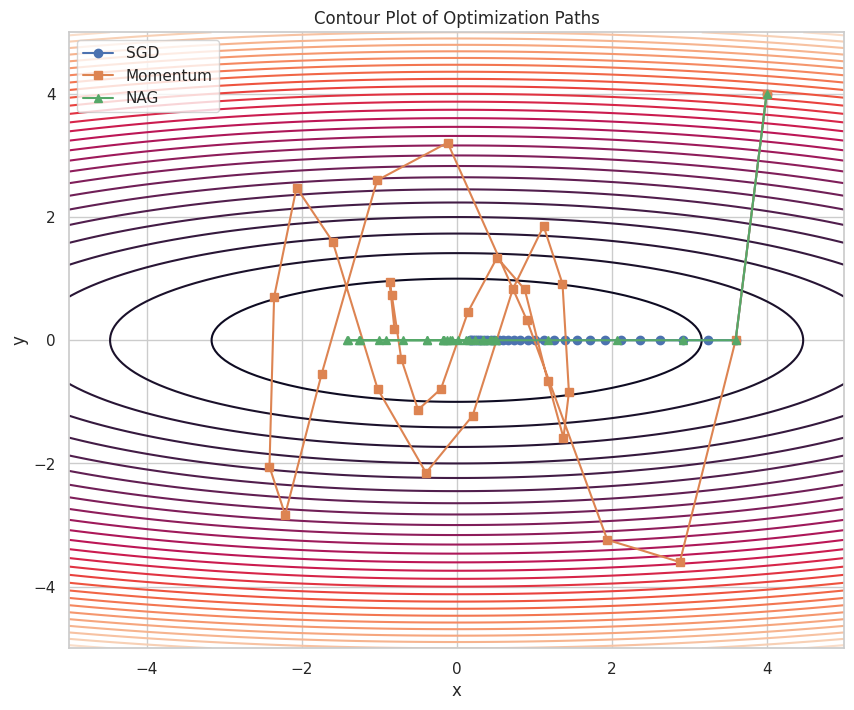

In [13]:
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=30)
plt.plot(path_sgd[:,0], path_sgd[:,1], 'o-', label='SGD')
plt.plot(path_momentum[:,0], path_momentum[:,1], 's-', label='Momentum')
plt.plot(path_nag[:,0], path_nag[:,1], '^-', label='NAG')
plt.legend()
plt.title('Contour Plot of Optimization Paths')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

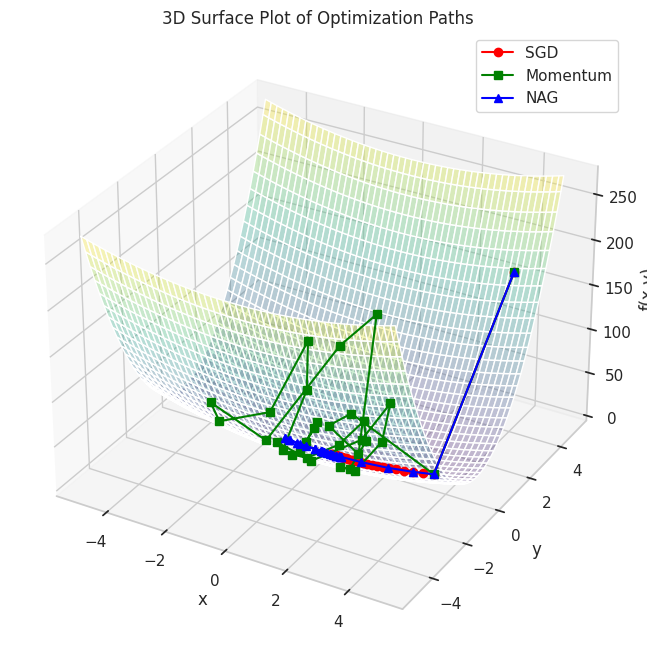

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3, cmap='viridis') # Added colormap for surface

ax.plot(path_sgd[:,0], path_sgd[:,1], f(path_sgd[:,0], path_sgd[:,1]), color='red', label='SGD', marker='o') # Added color, label, and marker
ax.plot(path_momentum[:,0], path_momentum[:,1], f(path_momentum[:,0], path_momentum[:,1]), color='green', label='Momentum', marker='s') # Added color, label, and marker
ax.plot(path_nag[:,0], path_nag[:,1], f(path_nag[:,0], path_nag[:,1]), color='blue', label='NAG', marker='^') # Added color, label, and marker

ax.set_title('3D Surface Plot of Optimization Paths')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
plt.show()

## 3. Analyzing the Effect of Varying Steps (Epochs)

This section explores how the number of optimization steps (epochs) influences the convergence behavior of SGD, Momentum, and NAG optimizers. We will visualize their paths on contour plots for different step counts.


--- Running with 10 steps ---


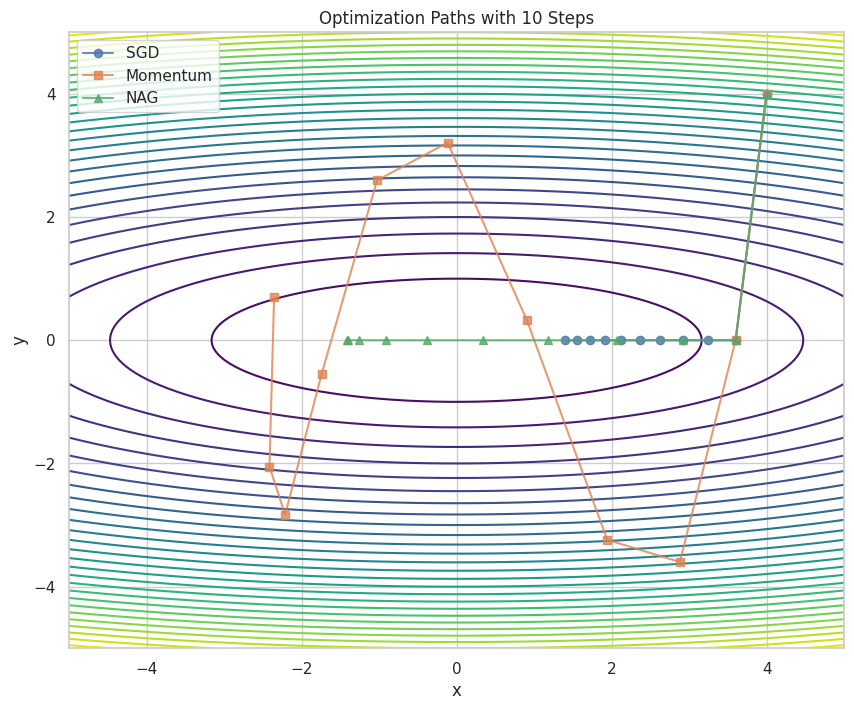


--- Running with 30 steps ---


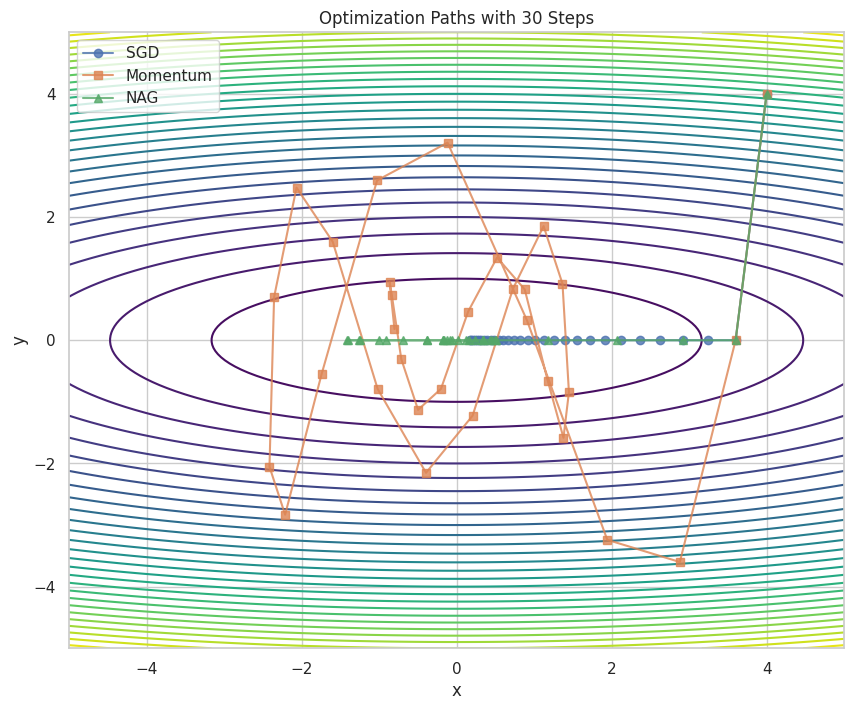


--- Running with 50 steps ---


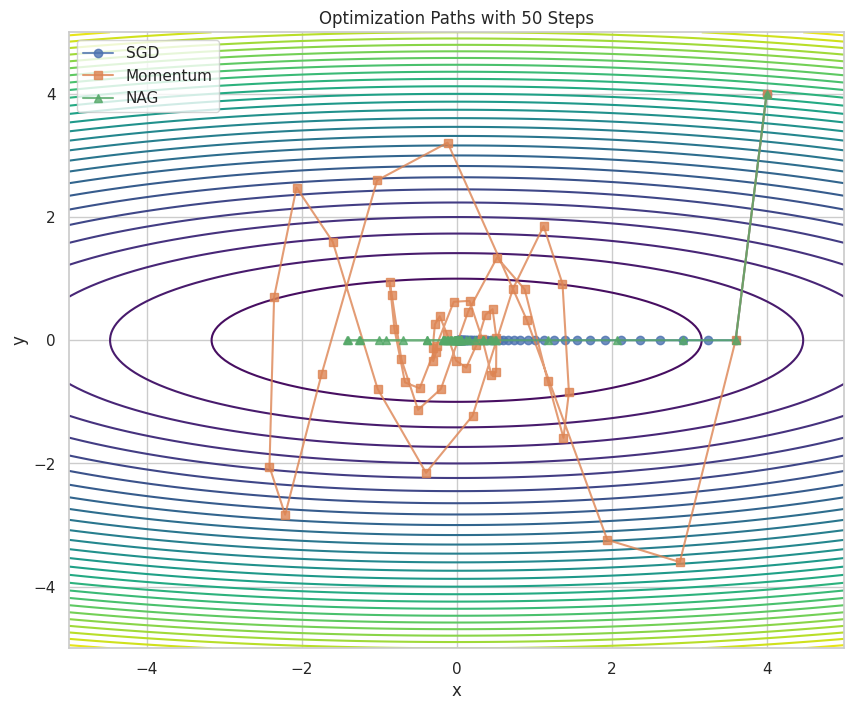

In [15]:
steps_to_test = [10, 30, 50]

for current_steps in steps_to_test:
    print(f"\n--- Running with {current_steps} steps ---")

    path_sgd_current_steps = sgd(start_point, steps=current_steps)
    path_momentum_current_steps = momentum(start_point, steps=current_steps)
    path_nag_current_steps = nag(start_point, steps=current_steps)

    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=30, cmap='viridis')
    plt.plot(path_sgd_current_steps[:,0], path_sgd_current_steps[:,1], 'o-', label='SGD', alpha=0.8)
    plt.plot(path_momentum_current_steps[:,0], path_momentum_current_steps[:,1], 's-', label='Momentum', alpha=0.8)
    plt.plot(path_nag_current_steps[:,0], path_nag_current_steps[:,1], '^-', label='NAG', alpha=0.8)
    plt.legend()
    plt.title(f'Optimization Paths with {current_steps} Steps')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()